In [1]:
import pandas as pd
import glob

In [2]:
file_paths = glob.glob('IG_Sentiments/*.csv')

In [5]:
dfs = []  # List to store DataFrames
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

In [6]:
merged_df = pd.concat(dfs, ignore_index=True)
merged_df

User Id          User Name         Comment Id  \
0    48617138174  celebobos_fadehub  18214535368270245   
1      146184457        sirprestige  18281736652153504   
2     7223632007      dutch_thaheat  17991800591458739   
3      326067885      steven_ortice  18093307435344970   
4    54764371977   therealkarlisto_  17914085000829248   
..           ...                ...                ...   
411   1785774005           v_miruka  18023420776662615   
412   2112894404   nyachombakariuki  17989602401121274   
413   2232768012        just_scovia  18207313480254937   
414   2232768012        just_scovia  17971343468408979   
415     24976742        stribling67  17978487371319208   

                                          Comment Text  \
0    @gmoneyizme great vibes,🔥🔥🔥🙌this makes me miss...   
1                             This looks a vibe!!! 🔥🔥🔥   
2                           Nice experience that was 🔥   
3                                            Success 🔥   
4                              What a night it was🔥🔥🔥🔥   
..                                                 ...   
411                                       Vile inafaa😎   
412                                           ❤️❤️❤️❤️   
413                       @nyachombakariuki ❤️❤️❤️❤️❤️   
414                              @v_miruka yeees❤️❤️❤️   
415                                              🔥🔥🔥🔥😍   

                                     Profile URL  \
0    https://www.instagram.com/celebobos_fadehub   
1          https://www.instagram.com/sirprestige   
2        https://www.instagram.com/dutch_thaheat   
3        https://www.instagram.com/steven_ortice   
4     https://www.instagram.com/therealkarlisto_   
..                                           ...   
411           https://www.instagram.com/v_miruka   
412   https://www.instagram.com/nyachombakariuki   
413        https://www.instagram.com/just_scovia   
414        https://www.instagram.com/just_scovia   
415        https://www.instagram.com/stribling67   

                                            Avatar URL  \
0    https://scontent-mba1-1.cdninstagram.com/v/t51...   
1    https://scontent-mba1-1.cdninstagram.com/v/t51...   
2    https://scontent-mba1-1.cdninstagram.com/v/t51...   
3    https://scontent-mba1-1.cdninstagram.com/v/t51...   
4    https://scontent-mba1-1.cdninstagram.com/v/t51...   
..                                                 ...   
411  https://scontent-mba1-1.cdninstagram.com/v/t51...   
412  https://scontent-mba1-1.cdninstagram.com/v/t51...   
413  https://scontent-mba1-1.cdninstagram.com/v/t51...   
414  https://scontent-mba1-1.cdninstagram.com/v/t51...   
415  https://scontent-mba1-1.cdninstagram.com/v/t51...   

                Publish Date  
0    11/13/2023, 12:01:34 PM  
1    11/13/2023, 12:02:07 PM  
2    11/13/2023, 12:05:51 PM  
3    11/13/2023, 12:15:24 PM  
4    11/13/2023, 12:17:35 PM  
..                       ...  
411    9/22/2023, 7:43:27 PM  
412    9/22/2023, 8:10:00 PM  
413    9/22/2023, 8:10:12 PM  
414    9/22/2023, 8:10:59 PM  
415    9/23/2023, 6:10:17 AM  

[416 rows x 7 columns]

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re  
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

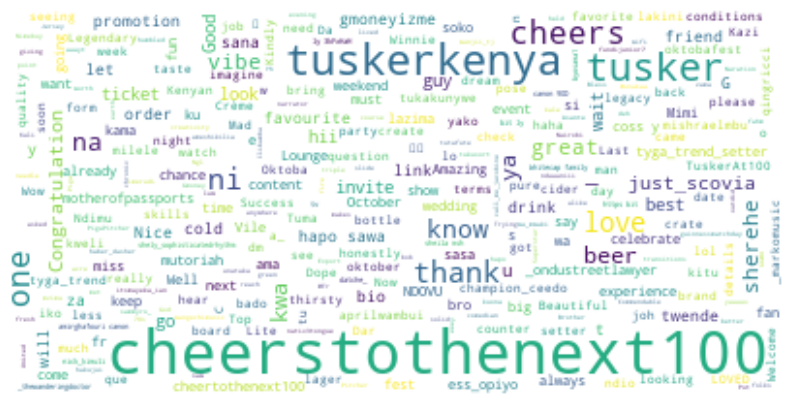

In [13]:
text = merged_df['Comment Text'].str.cat(sep=' ')
wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               min_font_size=3,
               max_words=300).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
# Define a class to clean the twitter data for easier analysis and do a sentiment analysis.  
# refactoring these class to clean and analyze instagram comments
class CleanTweets:
    def __init__(self, data) -> None:
        self.data = data.copy()
        self.data.dropna(inplace=True)
    def clean_insta_data(self):
        # Remove URLs 
        self.data['Comment Text'] = self.data['Comment Text'].apply(lambda x: re.sub(r'http\S+', '',x))
        # Remove mentions 
        self.data['Comment Text'] = self.data['Comment Text'].apply(lambda x: re.sub(r'@\S+', '',x))
        # Remove hashtags 
        self.data['Comment Text'] = self.data['Comment Text'].apply(lambda x: re.sub(r'#\S+', '',x))
        # Remove punctuation 
        self.data['Comment Text'] = self.data['Comment Text'].apply(lambda x: re.sub(r'[^\w\s]', '',x))
        # Remove emojis 
        self.data['Comment Text'] = self.data['Comment Text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
        # Remove numbers 
        self.data['Comment Text'] = self.data['Comment Text'].apply(lambda x: re.sub(r'\d+', '',x))
        # Remove extra whitespace 
        self.data['Comment Text'] = self.data['Comment Text'].apply(lambda x: re.sub(r'\s+', ' ',x))
        # Remove leading and trailing whitespace 
        self.data['Comment Text'] = self.data['Comment Text'].str.strip()
        #
        self.data['Comment Text'] = self.data['Comment Text'].astype(str)
        return self.data

class SentimentAnalyzer(CleanTweets):
    def __init__(self, data) -> None:
        super().__init__(data)

    def analyze_sentiment(self,data):
        # Analyze sentiment using VaderSentiment
        vader = SentimentIntensityAnalyzer()
        self.data['compound'] = self.data['Comment Text'].apply(lambda text: vader.polarity_scores(text)['compound'])
        
        # self.data['weighted_compound'] = (self.data['compound'] * self.data['No_of_tweets']) + self.data['No_of_likes']

        return self.data

sentiments = SentimentAnalyzer(merged_df)
df_cleaned = sentiments.clean_insta_data()
sents = sentiments.analyze_sentiment(df_cleaned)
sents

User Id          User Name         Comment Id  \
0    48617138174  celebobos_fadehub  18214535368270245   
1      146184457        sirprestige  18281736652153504   
2     7223632007      dutch_thaheat  17991800591458739   
3      326067885      steven_ortice  18093307435344970   
4    54764371977   therealkarlisto_  17914085000829248   
..           ...                ...                ...   
411   1785774005           v_miruka  18023420776662615   
412   2112894404   nyachombakariuki  17989602401121274   
413   2232768012        just_scovia  18207313480254937   
414   2232768012        just_scovia  17971343468408979   
415     24976742        stribling67  17978487371319208   

                              Comment Text  \
0    great vibesthis makes me miss Nairobi   
1                        This looks a vibe   
2                 Nice experience that was   
3                                  Success   
4                      What a night it was   
..                                     ...   
411                            Vile inafaa   
412                                          
413                                          
414                                  yeees   
415                                          

                                     Profile URL  \
0    https://www.instagram.com/celebobos_fadehub   
1          https://www.instagram.com/sirprestige   
2        https://www.instagram.com/dutch_thaheat   
3        https://www.instagram.com/steven_ortice   
4     https://www.instagram.com/therealkarlisto_   
..                                           ...   
411           https://www.instagram.com/v_miruka   
412   https://www.instagram.com/nyachombakariuki   
413        https://www.instagram.com/just_scovia   
414        https://www.instagram.com/just_scovia   
415        https://www.instagram.com/stribling67   

                                            Avatar URL  \
0    https://scontent-mba1-1.cdninstagram.com/v/t51...   
1    https://scontent-mba1-1.cdninstagram.com/v/t51...   
2    https://scontent-mba1-1.cdninstagram.com/v/t51...   
3    https://scontent-mba1-1.cdninstagram.com/v/t51...   
4    https://scontent-mba1-1.cdninstagram.com/v/t51...   
..                                                 ...   
411  https://scontent-mba1-1.cdninstagram.com/v/t51...   
412  https://scontent-mba1-1.cdninstagram.com/v/t51...   
413  https://scontent-mba1-1.cdninstagram.com/v/t51...   
414  https://scontent-mba1-1.cdninstagram.com/v/t51...   
415  https://scontent-mba1-1.cdninstagram.com/v/t51...   

                Publish Date  compound  
0    11/13/2023, 12:01:34 PM    0.5423  
1    11/13/2023, 12:02:07 PM    0.0000  
2    11/13/2023, 12:05:51 PM    0.4215  
3    11/13/2023, 12:15:24 PM    0.5719  
4    11/13/2023, 12:17:35 PM    0.0000  
..                       ...       ...  
411    9/22/2023, 7:43:27 PM   -0.6249  
412    9/22/2023, 8:10:00 PM    0.0000  
413    9/22/2023, 8:10:12 PM    0.0000  
414    9/22/2023, 8:10:59 PM    0.4019  
415    9/23/2023, 6:10:17 AM    0.0000  

[415 rows x 8 columns]

In [ ]:
### 

In [54]:
sents[['Comment Text','compound']].sample(15)

Comment Text  compound
154                        Sensacional    0.0000
358                                       0.0000
340                              Remix    0.0000
410                        say no more   -0.2960
61          guka ali buy shamba na bob    0.0000
180              Mmesema tusipate homa    0.0000
227  I know you would love to show out    0.6369
323                     Crme dela Crme    0.0000
137                                       0.0000
385                         ni kuonewa    0.0000
295         Is it an invite only event    0.1531
366    Mimi nishamshonea wedding dress    0.0000
347          tushakupea form ya Oktoba    0.0000
127                          Skillllls    0.0000
8                            A content    0.0000

In [35]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores("is good")

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}